#**ML Assignment 4 – Logistic Regression, Decision Tree, KNN**

##**Campus Placement Prediction**

The goal of this assignment is to develop and evaluate predictive classifier models to
determine a student's placement status based on a variety of academic and extracurricular
features. The dataset includes factors such as CGPA, internship experience, project
involvement, and other relevant attributes. By building and comparing three distinct machine
learning models — Logistic Regression, Decision Tree, and K-Nearest Neighbors (KNN) —
you will assess which model best predicts whether a student will be placed or not.

***Dataset Link:***

https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/campus_placement.csv

**Machine Learning Model Building Steps:-**

**1. Data Preprocessing:**

***1.1. Load the Dataset:*** Load the dataset and perform an initial exploration to understand
its structure and content.


In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/campus_placement.csv")
df.head(10) # First 10 rows

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
5,6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced
6,7,7.7,1,1,1,76,4.0,No,No,62,65,NotPlaced
7,8,7.7,2,1,0,85,3.5,Yes,Yes,59,72,NotPlaced
8,9,6.5,1,1,0,84,3.9,No,Yes,75,71,NotPlaced
9,10,7.8,1,3,2,79,4.4,Yes,Yes,85,86,Placed


In [ ]:
df.tail(10) # Last 10 rows

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9990,9991,7.4,0,3,1,90,3.8,No,Yes,82,68,NotPlaced
9991,9992,8.4,2,3,1,84,4.5,Yes,Yes,84,87,Placed
9992,9993,8.0,2,1,2,78,4.4,Yes,Yes,75,72,Placed
9993,9994,6.6,1,1,1,71,4.5,No,Yes,55,73,NotPlaced
9994,9995,7.8,2,2,2,80,4.8,Yes,Yes,79,69,NotPlaced
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


In [ ]:
df.shape # Rows and Columns

(10000, 12)

In [ ]:
df.info() # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.describe() # Statistical summary

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


### **Dataset Summary Analysis**

1. **Minimal Difference Between Percentiles**  
   - The difference between the **minimum and 25th percentile** values, as well as between the **maximum and 75th percentile** values, is relatively small for most variables.
   - This suggests **low skewness** and **minimal outliers** within these ranges, indicating a **consistent data distribution**.

2. **Standard Deviation**  
   - The **standard deviation** values for most columns are moderate, showing there isn’t excessive variability around the mean.
   - This consistency supports reliable analysis, as there are no extreme fluctuations in the data.

3. **Dataset Quality**  
   - Given the small percentile differences and moderate standard deviations, the dataset appears **well-balanced and suitable for analysis**.
   - These characteristics contribute to data reliability and reduce the need for significant preprocessing to address outliers or inconsistencies.

**Overall Conclusion:**  
These points indicate that the **dataset quality is sound** and can be effectively used for analysis without concerns over high variance or excessive outliers.


***1.2. Handle Missing Values:*** Check for and handle any missing values in the dataset if
present

In [ ]:
df.isnull().sum() # Checking for missing values

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


***1.3. Encode Categorical Features:*** Convert categorical features into numerical format
using appropriate encoding techniques.


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head(10) # First 10 rows after Label Encoding

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1
5,6,7.0,0,2,2,71,4.2,1,0,55,66,0
6,7,7.7,1,1,1,76,4.0,0,0,62,65,0
7,8,7.7,2,1,0,85,3.5,1,1,59,72,0
8,9,6.5,1,1,0,84,3.9,0,1,75,71,0
9,10,7.8,1,3,2,79,4.4,1,1,85,86,1


**1.4. Feature Selection:** Select the relevant features and the target variable for your
analysis.

In [ ]:
X = df.drop(columns=['StudentID', 'PlacementStatus']) # Features Variable
Y = df['PlacementStatus'] # Target Variable

**1.5. Data Splitting:** Split the dataset into training and testing sets (e.g., 80% training,
20% testing)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**1.6. Feature Scaling:** Standardize or normalize numerical features using parameters
derived from the training set, and apply the same scaling to the test set.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_cols = ['AptitudeTestScore', 'SSC_Marks', 'HSC_Marks']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols]).round(3)

# Transform the test data using the same parameters
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols]).round(3)

**2. Logistic Regression - Model Building and Evaluation:**

***2.1. Model Building:*** Build a Logistic Regression model using the training dataset.
Experiment with different values for the max_iter parameter **e.g., LogisticRegression(max_iter=300).**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model with max_iter=300
logreg_model = LogisticRegression(max_iter=300)
logreg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=300)

**2.2. Model Evaluation:** Evaluate the model on the testing dataset and report the
accuracy score.


In [ ]:
# Predict the target variable for the test set
Y_pred = logreg_model.predict(X_test)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy:.4f} - {round(accuracy * 100, 3)}%")

Accuracy of Logistic Regression Model: 0.7945 - 79.45%


**3. Decision Tree - Model Building and Evaluation:**

***3.1. Model Building:*** Build a Decision Tree model using the training dataset.
Experiment with different values for the max_depth parameter to control the tree's
depth and prevent overfitting.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize and train the Decision Tree model with different max_depth values
for max_depth in range(2, 12):  # Experiment with different depths
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, Y_train)

***3.2. Model Evaluation:*** Evaluate the model on the testing dataset and report the
accuracy score.

Accuracy of Decision Tree Model (max_depth=6): 0.7825 - 78.25% 
Accuracy of Decision Tree Model (max_depth=4): 0.7815 - 78.15% 
Accuracy of Decision Tree Model (max_depth=8): 0.7790 - 77.9% 
Accuracy of Decision Tree Model (max_depth=5): 0.7785 - 77.85% 
Accuracy of Decision Tree Model (max_depth=3): 0.7770 - 77.7% 
Accuracy of Decision Tree Model (max_depth=7): 0.7720 - 77.2% 
Accuracy of Decision Tree Model (max_depth=11): 0.7640 - 76.4% 
Accuracy of Decision Tree Model (max_depth=9): 0.7630 - 76.3% 
Accuracy of Decision Tree Model (max_depth=10): 0.7625 - 76.25% 
Accuracy of Decision Tree Model (max_depth=2): 0.7435 - 74.35% 

Best Decision Tree Accuracy: 0.7825 - 78.25% at max_depth=6


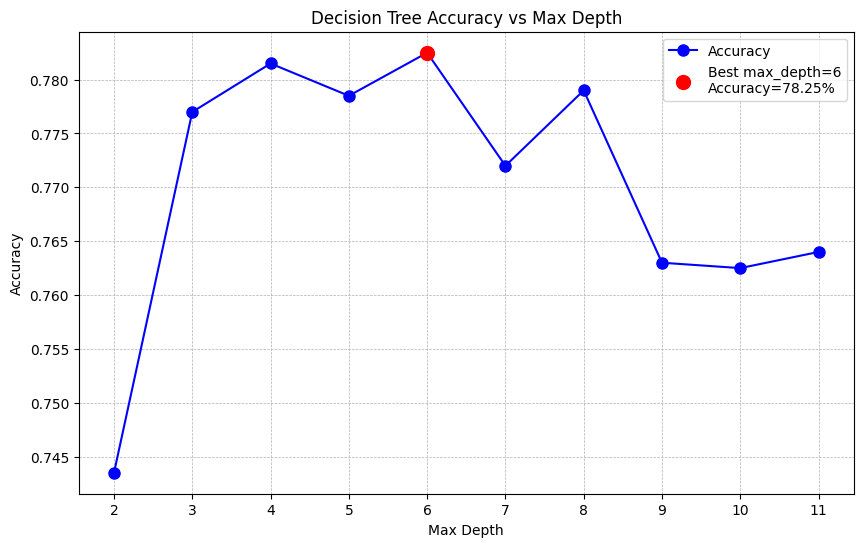

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

# Initialize a list to store the results
results = []

# Initialize and train the Decision Tree model with different max_depth values
for max_depth in range(2, 12):  # Experiment with different depths
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, Y_train)

    # Predict the target variable for the test set
    Y_pred = dt_model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    # Store the results in the list
    results.append((max_depth, accuracy))

# Sort results by accuracy in descending order and retrieve the best result
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)
best_depth, best_accuracy = sorted_results[0]

# Print the sorted results (Top 10)
for max_depth, accuracy in sorted_results[:10]:
    print(f"Accuracy of Decision Tree Model (max_depth={max_depth}): {accuracy:.4f} - {round(accuracy * 100, 3)}% ")

# Print the best decision tree accuracy separately
print(f"\nBest Decision Tree Accuracy: {best_accuracy:.4f} - {round(best_accuracy * 100, 3)}% at max_depth={best_depth}")

# Extract depths and accuracies for plotting
depths = [depth for depth, acc in results]
accuracies = [acc for depth, acc in results]

# Plotting Accuracy vs Max Depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, color='blue', marker='o', linestyle='-', markersize=8, label="Accuracy")
plt.scatter(best_depth, best_accuracy, color='red', s=100, zorder=5, label=f"Best max_depth={best_depth}\nAccuracy={best_accuracy:.2%}")

# Adding grid, labels, and title
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Decision Tree Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(range(min(depths), max(depths) + 1))  # Adding grid lines for each max depth
plt.legend()
plt.show()

# Train the best Decision Tree model with the selected max_depth for tree visualization
best_dt_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_dt_model.fit(X_train, Y_train)

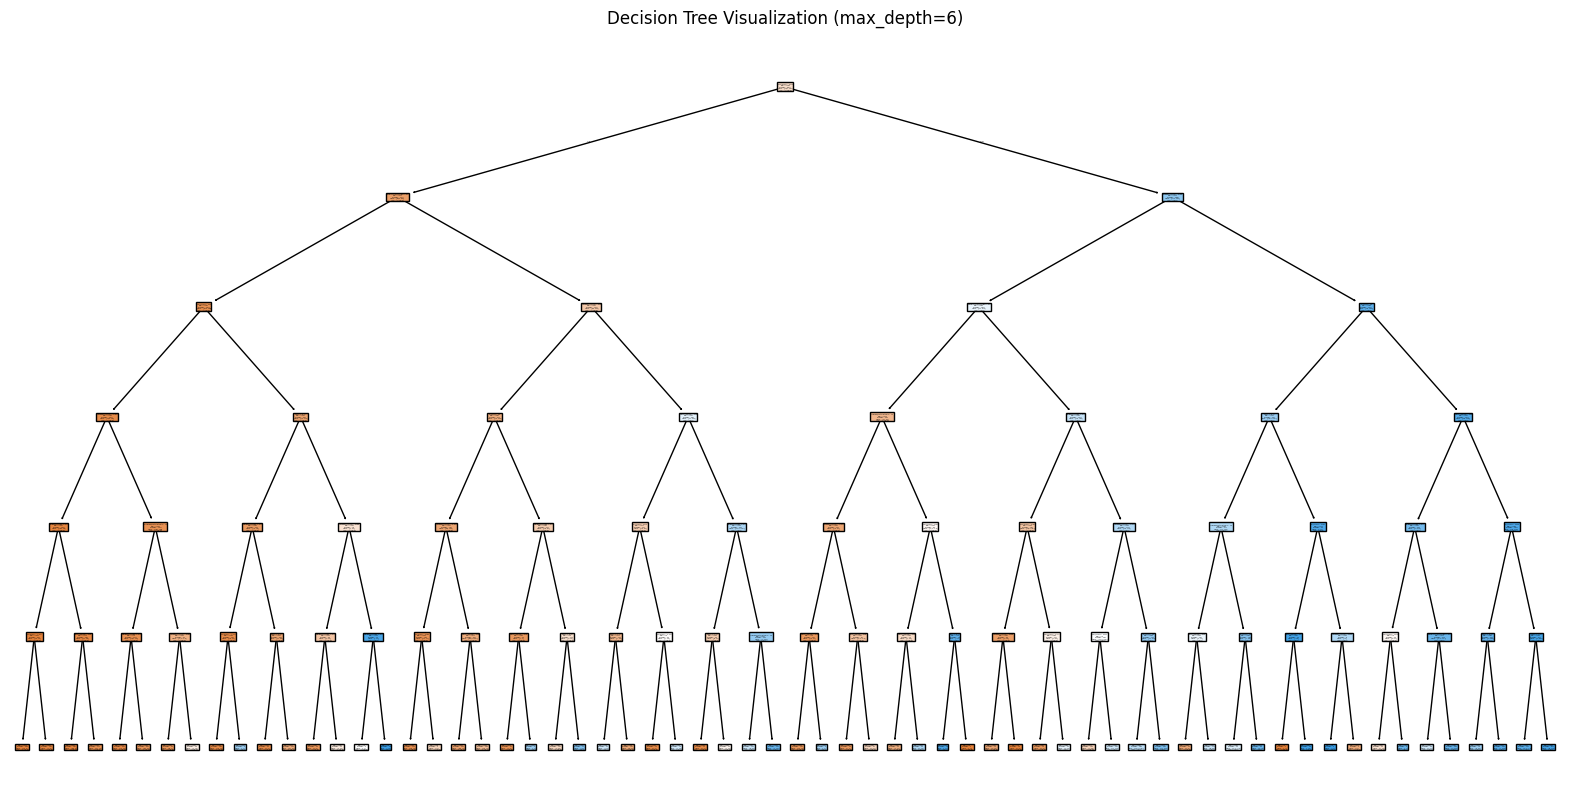

In [ ]:
# Plot the Decision Tree for the best model
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X_train.columns, class_names=['NotPlaced', 'Placed'], filled=True)
plt.title(f"Decision Tree Visualization (max_depth={best_depth})")
plt.show()

**4. K-Nearest Neighbors (KNN) - Model Building and Evaluation:**

***4.1. Model Building:*** Build a KNN model using the training dataset. Experiment with
different values of k (number of neighbors).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize a list to store the results
knn_results = []

# Experiment with different values of k
for k in range(1, 21):  # Try k values from 1 to 20
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)

    # Store the k and model instance for later use
    knn_results.append((k, knn_model))


***4.2. Model Evaluation:*** Evaluate the model on the testing dataset.

In [ ]:
# Initialize a list to store accuracy results
knn_accuracy_results = []

# Evaluate the model on the testing dataset
for k, model in knn_results:
    # Predict the target variable for the test set
    Y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    # Store the k and accuracy results
    knn_accuracy_results.append((k, accuracy))

***4.3. Reporting:*** Report the accuracy score for each value of k and provide a brief
interpretation of the results. Choose the best k value and justify your choice.


In [ ]:
# Sort results by accuracy in descending order
sorted_knn_results = sorted(knn_accuracy_results, key=lambda x: x[1], reverse=True)

# Print the sorted results
for k, accuracy in sorted_knn_results:
    print(f"Accuracy of KNN Model (k={k}): {accuracy:.4f} - {round(accuracy * 100, 3)}%")

# Choose the best k value based on the highest accuracy
best_k = sorted_knn_results[0][0]
best_accuracy = sorted_knn_results[0][1]
print(f"\nBest k value: {best_k} with accuracy: {best_accuracy:.4f} - {round(best_accuracy * 100, 3)}%")

Accuracy of KNN Model (k=19): 0.7915 - 79.15%
Accuracy of KNN Model (k=20): 0.7910 - 79.1%
Accuracy of KNN Model (k=18): 0.7885 - 78.85%
Accuracy of KNN Model (k=17): 0.7865 - 78.65%
Accuracy of KNN Model (k=14): 0.7860 - 78.6%
Accuracy of KNN Model (k=11): 0.7855 - 78.55%
Accuracy of KNN Model (k=12): 0.7845 - 78.45%
Accuracy of KNN Model (k=13): 0.7845 - 78.45%
Accuracy of KNN Model (k=16): 0.7845 - 78.45%
Accuracy of KNN Model (k=15): 0.7840 - 78.4%
Accuracy of KNN Model (k=9): 0.7835 - 78.35%
Accuracy of KNN Model (k=10): 0.7835 - 78.35%
Accuracy of KNN Model (k=8): 0.7775 - 77.75%
Accuracy of KNN Model (k=7): 0.7745 - 77.45%
Accuracy of KNN Model (k=5): 0.7685 - 76.85%
Accuracy of KNN Model (k=6): 0.7660 - 76.6%
Accuracy of KNN Model (k=4): 0.7585 - 75.85%
Accuracy of KNN Model (k=3): 0.7535 - 75.35%
Accuracy of KNN Model (k=2): 0.7395 - 73.95%
Accuracy of KNN Model (k=1): 0.7315 - 73.15%

Best k value: 19 with accuracy: 0.7915 - 79.15%


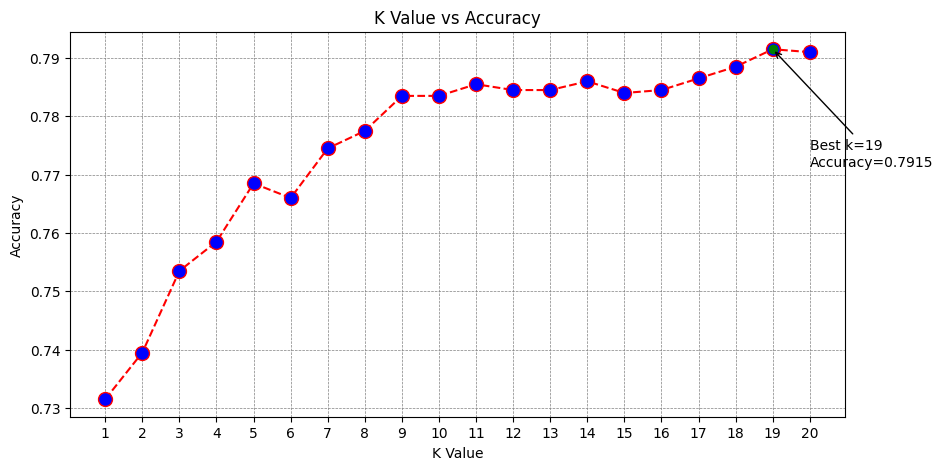

In [ ]:
# Initialize a list to store accuracy results
accuracy_values = []

# Experiment with different values of k and store the results
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    Y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_values.append(accuracy)  # Collect accuracy for each k

# Find the best accuracy and corresponding k value
max_accuracy = max(accuracy_values)
best_k = accuracy_values.index(max_accuracy) + 1  # +1 because k starts from 1

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), accuracy_values, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xticks(range(1, 21))
plt.title('K Value vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

# Highlight the point with the highest accuracy
plt.plot(best_k, max_accuracy, 'go')  # Green point for highest accuracy
plt.annotate(f'Best k={best_k}\nAccuracy={max_accuracy:.4f}',
             xy=(best_k, max_accuracy),
             xytext=(best_k+1, max_accuracy-0.02),  # Offset for better readability
             arrowprops=dict(facecolor='green', arrowstyle="->"))

# Add grid with specific styling
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Customize grid

plt.show()

## **Interpretation of KNN Model Results**

The K-Nearest Neighbors (KNN) model was evaluated using various values of \( k \) (the number of neighbors), and the accuracy scores were recorded for each. The results indicate the following trends:

1. **Accuracy Trend**:
   - The accuracy of the model generally increased with higher values of \( k \) up to \( k = 19 \), which achieved the highest accuracy of **79.15%**.

   - However, as \( k \) increased beyond 19 to 20, the accuracy slightly decreased to **79.10%**, indicating that while more neighbors can sometimes provide a more stable prediction, it can also dilute the influence of closer neighbors, leading to lower accuracy.

2. **Stability of Results**:
   - The accuracy remained relatively stable around **78.5%** to **79.15%** for values of \( k \) between 18 and 19, suggesting that these values are optimal in capturing the underlying patterns in the data without overfitting or underfitting.

   - Notably, the accuracies for \( k \) values below 19 decrease gradually, with the lowest accuracy observed at \( k = 1 \) (73.15%). This can be attributed to the model being overly sensitive to noise and anomalies in the training data when using fewer neighbors.

## **Best k Value and Justification**

The best \( k \) value identified is **19**, with an accuracy of **79.15%**.

**Justification**:
- **Trade-off Between Bias and Variance**: Choosing \( k = 19 \) strikes a balance between bias and variance. While a lower \( k \) (e.g., 1 or 2) may capture local patterns, it can also lead to overfitting due to noise in the data. Conversely, a very high \( k \) may result in underfitting, where the model becomes too generalized and fails to capture important local variations.

- **Performance Stability**: The slight decrease in accuracy when moving from \( k = 19 \) to \( k = 20 \) supports the choice of \( k = 19 \) as the optimal value, as it maximizes the accuracy without sacrificing performance.

- **Practical Applicability**: In practice, a \( k \) value of 19 ensures that the model uses a sufficient number of neighbors to make robust predictions while still being sensitive enough to variations in the data.

Overall, the model demonstrates a solid performance, and \( k = 19 \) is recommended for further predictions using the KNN algorithm.


**5. Comparison and Analysis:**

**5.1.** Compare the accuracy scores of the three models.

## **5.1 Comparison and Analysis**

In this section, we will compare the accuracy scores of three different models: Logistic Regression, Decision Tree, and K-Nearest Neighbors (KNN).

### **Accuracy Scores**

- **Logistic Regression**:
  - Accuracy: **0.7945** - **79.45%**
  
- **Decision Tree**:
  - Accuracy (max_depth=6): **0.7825** - **78.25%**
  - Accuracy (max_depth=4): **0.7815** - **78.15%**
  - Accuracy (max_depth=8): **0.7790** - **77.90%**
  - Accuracy (max_depth=5): **0.7785** - **77.85%**
  - Accuracy (max_depth=3): **0.7770** - **77.70%**
  - Accuracy (max_depth=7): **0.7720** - **77.20%**
  - Accuracy (max_depth=11): **0.7640** - **76.40%**
  - Accuracy (max_depth=9): **0.7630** - **76.30%**
  - Accuracy (max_depth=10): **0.7625** - **76.25%**
  - Accuracy (max_depth=2): **0.7435** - **74.35%**

- **K-Nearest Neighbors (KNN)**:
  - Accuracy (k=19): **0.7915** - **79.15%**
  - Accuracy (k=20): **0.7910** - **79.10%**
  - Accuracy (k=18): **0.7885** - **78.85%**
  - Accuracy (k=17): **0.7865** - **78.65%**
  - Accuracy (k=14): **0.7860** - **78.60%**
  - Accuracy (k=11): **0.7855** - **78.55%**
  - Accuracy (k=12): **0.7845** - **78.45%**
  - Accuracy (k=13): **0.7845** - **78.45%**
  - Accuracy (k=16): **0.7845** - **78.45%**
  - Accuracy (k=15): **0.7840** - **78.40%**
  - Accuracy (k=9): **0.7835** - **78.35%**
  - Accuracy (k=10): **0.7835** - **78.35%**
  - Accuracy (k=8): **0.7775** - **77.75%**
  - Accuracy (k=7): **0.7745** - **77.45%**
  - Accuracy (k=5): **0.7685** - **76.85%**
  - Accuracy (k=6): **0.7660** - **76.60%**
  - Accuracy (k=4): **0.7585** - **75.85%**
  - Accuracy (k=3): **0.7535** - **75.35%**
  - Accuracy (k=2): **0.7395** - **73.95%**
  - Accuracy (k=1): **0.7315** - **73.15%**

### **Analysis**

- **Model Performance**:
  - The **Logistic Regression** model achieved the highest accuracy of **79.45%**, indicating that it is the best-performing model among the three for this dataset.

  - The **KNN** model, particularly at \( k = 19 \), closely follows with an accuracy of **79.15%**, which shows that it performs well but slightly less effectively than Logistic Regression.

  - The **Decision Tree** model, even at its optimal depth of 6, has a lower accuracy of **78.25%** compared to both Logistic Regression and KNN.

- **Choosing the Best Model**:
  - Based on the accuracy scores, the **Logistic Regression** model is recommended for deployment due to its superior performance.

  - While **KNN** also shows competitive performance, its sensitivity to the choice of \( k \) can lead to variability in predictions. The **Decision Tree**, though interpretable, does not perform as well as the other two models in this scenario.

Overall, these results highlight the importance of selecting the right model based on accuracy metrics while considering the characteristics of the dataset and the nature of the problem.


**5.2.** Discuss which model performed best and why, based on the accuracy scores and
other relevant factors

## **5.2 Model Performance Discussion**

### **Best Performing Model**

Based on the accuracy scores obtained from our experiments, the **Logistic Regression** model emerged as the best-performing model with an accuracy of **79.45%**. This model was followed closely by the **K-Nearest Neighbors (KNN)** model with a maximum accuracy of **79.15%** at \( k = 19 \), while the **Decision Tree** model achieved an accuracy of **78.25%** at its optimal depth.

### **Reasons for Performance**

1. **Logistic Regression**:
   - **Simplicity and Interpretability**: Logistic Regression is a relatively simple model that provides a clear understanding of how input features contribute to the output prediction. This interpretability can be crucial in many applications.

   - **Probabilistic Output**: It not only predicts the class labels but also provides probabilities, allowing for a nuanced understanding of confidence in predictions.

   - **Assumption of Linearity**: The underlying assumption that the relationship between the features and the log-odds of the outcome is linear can be beneficial if the actual relationships in the data are indeed approximately linear.

2. **K-Nearest Neighbors (KNN)**:
   - **Flexibility**: KNN is a non-parametric method that can adapt well to the structure of the data, making it effective in capturing complex patterns.

   - **Sensitivity to \( k \)**: Although KNN performed well, it is sensitive to the choice of \( k \). In this case, \( k = 19 \) yielded the best results. If a smaller \( k \) were chosen, it could lead to overfitting, while a larger \( k \) could underfit the model.

   - **Distance Metrics**: The choice of distance metric can significantly impact KNN's performance. The default Euclidean distance might not be optimal for all datasets.

3. **Decision Tree**:
   - **Interpretability**: Decision trees provide a clear and intuitive visualization of decisions, making them easy to interpret.

   - **Overfitting**: Although they can capture complex interactions, decision trees are prone to overfitting, especially with deeper trees. This issue may have affected their performance in this case, as seen in the lower accuracy compared to the other models.

   - **Instability**: Small changes in the data can lead to different splits in the tree, which can affect the model's performance.

### **Conclusion**

In summary, while all three models have their strengths,
- **Logistic Regression** is favored for this dataset due to its superior accuracy, interpretability, and robustness.

- **KNN**, while also effective, requires careful tuning of parameters.

- **Decision Trees**, although interpretable, may suffer from overfitting.

Therefore, for tasks requiring reliable predictions with clear insights, Logistic Regression is recommended as the best model for this analysis.


**5.3.** Reflect on the strengths and weaknesses of each model in the context of this dataset.

## **5.3 Model Strengths and Weaknesses Reflection**

### **1. Logistic Regression**

#### **Strengths:**
- **Simplicity**: Logistic Regression is easy to implement and understand, making it a good starting point for binary classification problems.

- **Interpretability**: The coefficients provide insights into the relationship between features and the target variable, allowing for straightforward interpretation.

- **Efficient**: This model is computationally efficient, especially for large datasets, as it requires less memory and processing power compared to more complex models.

- **Probabilistic Output**: It outputs probabilities, which can help assess the confidence of predictions.

#### **Weaknesses:**
- **Linearity Assumption**: The model assumes a linear relationship between the features and the log-odds of the outcome. If the true relationship is non-linear, the model may underperform.

- **Sensitivity to Outliers**: Logistic Regression can be influenced by outliers, which may distort the results.

- **Not Suitable for Complex Relationships**: It may struggle with datasets that involve complex feature interactions or non-linear relationships.

---

### **2. K-Nearest Neighbors (KNN)**

#### **Strengths:**
- **Non-parametric Nature**: KNN makes no assumptions about the underlying data distribution, which makes it flexible and applicable to various types of data.

- **Intuitive Concept**: The idea of classifying based on the closest neighbors is easy to grasp and explain.

- **Effective for Small Datasets**: KNN can perform well with smaller datasets where the decision boundary is complex.

#### **Weaknesses:**
- **Computationally Intensive**: As the dataset grows, KNN becomes slow, especially during the prediction phase, as it requires calculating the distance to every training sample.

- **Choice of \( k \)**: The performance is highly sensitive to the choice of \( k \). A poor choice can lead to overfitting or underfitting.

- **Sensitive to Irrelevant Features**: KNN is affected by noise and irrelevant features, which can distort distance calculations and impact accuracy.

---

### **3. Decision Tree**

#### **Strengths:**
- **Interpretability**: Decision trees provide a clear visual representation of decisions, making it easy to explain the model's logic to stakeholders.

- **Handles Non-linearity**: They can model complex relationships without requiring linearity assumptions, capturing interactions between features effectively.

- **No Feature Scaling Required**: Decision Trees do not require features to be normalized or standardized, simplifying the preprocessing steps.

#### **Weaknesses:**
- **Overfitting**: Decision trees can easily become too complex, fitting noise in the training data and leading to poor generalization on unseen data.

- **Instability**: Small changes in the data can result in a completely different tree structure, which can affect the model’s reliability.

- **Bias towards Dominant Classes**: In cases of imbalanced datasets, Decision Trees can be biased towards the majority class, leading to suboptimal performance.

---

### **Conclusion**

In summary, each model has its strengths and weaknesses, making them suitable for different scenarios.

- **Logistic Regression** is effective for simpler problems and when interpretability is key.

- **KNN** is flexible but can be inefficient for larger datasets.

- **Decision Trees** excel at capturing complex patterns but are prone to overfitting.

The choice of model should consider the specific characteristics of the dataset, including its size, feature relationships, and the importance of interpretability in the given context.


In [ ]:
df.head(10)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1
5,6,7.0,0,2,2,71,4.2,1,0,55,66,0
6,7,7.7,1,1,1,76,4.0,0,0,62,65,0
7,8,7.7,2,1,0,85,3.5,1,1,59,72,0
8,9,6.5,1,1,0,84,3.9,0,1,75,71,0
9,10,7.8,1,3,2,79,4.4,1,1,85,86,1


<Axes: xlabel='CGPA', ylabel='PlacementTraining'>

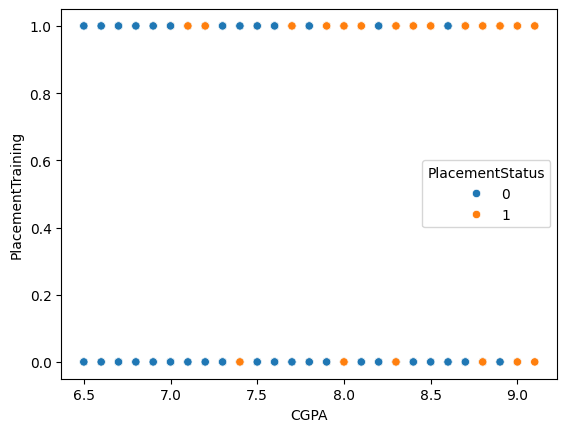

In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x='CGPA', y='PlacementTraining', hue='PlacementStatus')

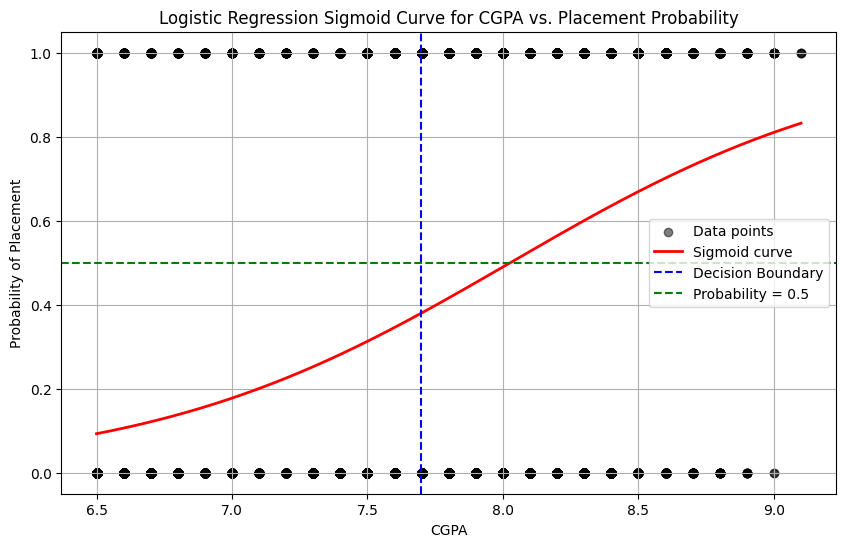

In [ ]:
import numpy as np

X = df[['CGPA', 'PlacementTraining']].values  # Features
y = df['PlacementStatus'].values  # Target

# Normalize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Fit logistic regression
model = LogisticRegression()
model.fit(X_scaled, y)

# Step 4: Generate values for the sigmoid curve
cgpa_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 300)  # CGPA values
avg_placement_training = np.mean(X[:, 1])  # Average placement training

# Scaling the CGPA values for prediction
cgpa_scaled = scaler.transform(np.column_stack((cgpa_range, np.full(cgpa_range.shape, avg_placement_training))))

# Predict probabilities
y_prob = model.predict_proba(cgpa_scaled)[:, 1]  # Probability of being placed

# Decision boundary for placement status
decision_boundary = scaler.inverse_transform([[0, avg_placement_training]])[0, 0]  # CGPA decision boundary (at x=0)

# Step 5: Plotting
plt.figure(figsize=(10, 6))
# Plot the original data points
plt.scatter(X[:, 0], y, color='black', label='Data points', alpha=0.5)
# Plot the sigmoid curve
plt.plot(cgpa_range, y_prob, color='red', linewidth=2, label='Sigmoid curve')
# Plot the decision boundary
plt.axvline(x=decision_boundary, color='blue', linestyle='--', label='Decision Boundary')
# Plot the horizontal line at y = 0.5 (threshold)
plt.axhline(y=0.5, color='green', linestyle='--', label='Probability = 0.5')

plt.xlabel('CGPA')
plt.ylabel('Probability of Placement')
plt.title('Logistic Regression Sigmoid Curve for CGPA vs. Placement Probability')
plt.legend()
plt.grid(True)
plt.show()

#**Predict New Data - LOGISTIC REGRESSION, DECISION TREE AND KNN**

In [ ]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [ ]:
# Display unique values for each relevant column in the test DataFrame
columns_of_interest = [
    "CGPA",
    "Internships",
    "Projects",
    "Workshops/Certifications",
    "AptitudeTestScore",
    "SoftSkillsRating",
    "ExtracurricularActivities",
    "PlacementTraining",
    "SSC_Marks",
    "HSC_Marks"
]

# Iterate through the specified columns and print unique values
for column in columns_of_interest:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}': {unique_values}")



Unique values in 'CGPA': [7.5 8.9 7.3 8.3 7.  7.7 6.5 7.8 7.9 7.4 8.6 8.2 6.8 7.6 6.7 8.4 8.5 6.9
 8.1 8.8 8.  6.6 7.2 7.1 8.7 9.  9.1]

Unique values in 'Internships': [1 0 2]

Unique values in 'Projects': [1 3 2 0]

Unique values in 'Workshops/Certifications': [1 2 0 3]

Unique values in 'AptitudeTestScore': [65 90 82 85 86 71 76 84 79 74 66 78 73 70 72 77 60 81 63 75 67 89 88 62
 80 68 87 69 83 64 61]

Unique values in 'SoftSkillsRating': [4.4 4.  4.8 4.5 4.2 3.5 3.9 4.6 4.1 4.7 3.4 3.8 4.3 3.6 3.3 3.2 3.7 3.
 3.1]

Unique values in 'ExtracurricularActivities': [0 1]

Unique values in 'PlacementTraining': [0 1]

Unique values in 'SSC_Marks': [61 78 79 81 74 55 62 59 75 85 82 71 84 63 72 58 77 56 68 76 64 66 60 65
 80 70 57 86 90 73 69 83 87 67 88 89]

Unique values in 'HSC_Marks': [79 82 80 88 66 65 72 71 86 87 83 73 78 63 75 69 57 61 85 68 81 84 60 67
 64 76 70 62 74 59 58 77]


In [ ]:
# Assuming 'df' is your original DataFrame and you have already defined 'X'
new_data = pd.DataFrame([[7.1, 2, 1, 3, 69, 3.5, 0, 1, 69, 93]], columns=df.drop(columns=['StudentID', 'PlacementStatus']).columns)
new_data

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.1,2,1,3,69,3.5,0,1,69,93


#**1. Predict New Data - LOGISTIC REGRESSION**

In [ ]:
logreg_model.predict(new_data)

array([1])

In [ ]:
logreg_model.predict_proba(new_data)[0,1]

1.0

In [ ]:
PlacementStatus = logreg_model.predict(new_data)

if PlacementStatus[0] == 1:
    print("The candidate is likely to be placed!")
else:
    print("The candidate is unlikely to be placed.")

The candidate is likely to be placed!


#**2. Predict New Data - DECISION TREE**

In [ ]:
dt_model.predict(new_data)

array([1])

In [ ]:
dt_model.predict_proba(new_data)[0,1]

0.8

In [ ]:
PlacementStatus = dt_model.predict(new_data)

if PlacementStatus[0] == 1:
    print("The candidate is likely to be placed!")
else:
    print("The candidate is unlikely to be placed.")

The candidate is likely to be placed!


#**3. Predict New Data - KNN**

In [ ]:
knn_model.predict(new_data)

array([1])

In [ ]:
knn_model.predict_proba(new_data)[0,1]

1.0

In [ ]:
PlacementStatus = knn_model.predict(new_data)

if PlacementStatus[0] == 1:
    print("The candidate is likely to be placed!")
else:
    print("The candidate is unlikely to be placed.")

The candidate is likely to be placed!


#**THANK YOU**